In [10]:
# Import data analysis modules
import numpy as np
import pandas as pd
# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import acquire

In [4]:
df = acquire.get_titanic_data()

In [6]:
df.embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object

In [8]:
onehotencoder = OneHotEncoder(categorical_features = [8])

In [5]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [6]:
#a copy of df with True/False in each observation. True if it is null
missing_values = df.isnull()

In [7]:
#'deck' and 'age' are the ones with missing values
missing_values.sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

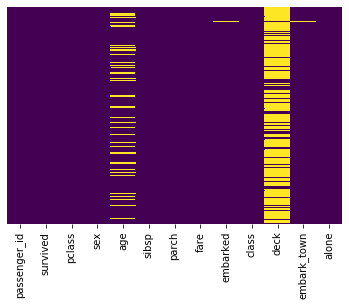

In [9]:
# Use seaborn to conduct heatmap to identify missing data
# data            the data to creat heatmap
# yticklabels     avoids plotting the column names
# cbar -> argument identifies if a colorbar is required or not
# cmap -> argument identifies the color of the heatmap

# The yellows are the missing values
sns.heatmap(data = missing_values, yticklabels=False, cbar=False, cmap='viridis')

## THE TARGET FEATURE IS 'survived'. Let's take a gander:

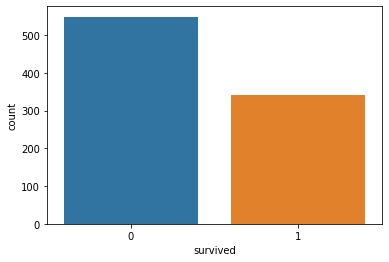

In [12]:
# Use the countplot() method to identify ratio of who survived vs. not
# (Tip) very helpful to get a visualization of the target label

# x -> argument referes to column of interest
# data -> argument refers to dataset
sns.countplot(x='survived', data=df)

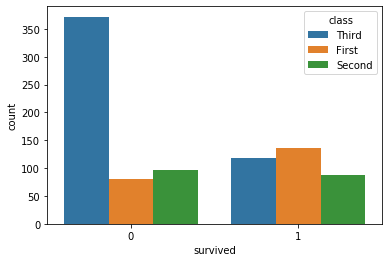

In [15]:
#The same plot with the added dimension of 'class'. This extra dimension is added by using the 'hue' parameter.
#I passed it the class column as the argument.
sns.countplot(x='survived', data=df, hue='class')

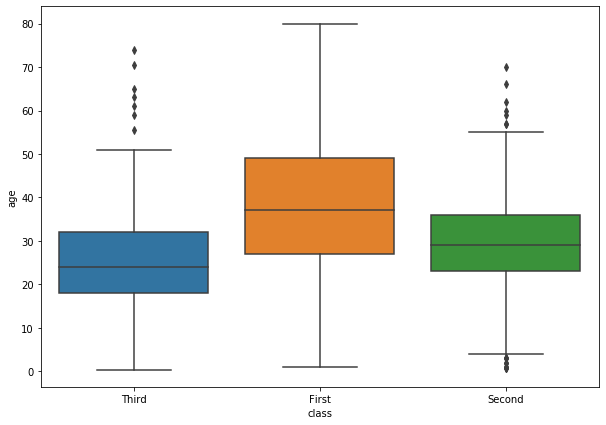

In [19]:
#Boxplot to show the distribution of ages. X is class, Y is age.
plt.figure(figsize = (10,7))
sns.boxplot(x='class', y='age', data=df)

In [25]:
df.columns[9]

'class'

In [22]:
df.columns[4]

'age'

In [26]:
type(df.columns[4])

str

In [27]:
def impute_age(cols):
    Age = cols[4]
    Class = cols[9]
    
    if pd.isnull(Age):
        if Class == 1:
            return 37
        elif Class == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [31]:
def impute_age(cols):
    Age = cols[4]
    Pclass = cols[9]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

## IndexError: ('index out of bounds', 'occurred at index 0')

In [35]:
# Apply function to impute the age for missing values
# The age column is at position 0
# The pclass column is at position 1
# axis -> argument refers to columns instead of rows to apply the impute_age function
#train['age'] = df[['age', 'class']].apply(impute_age, axis=1)

In [38]:
#remove columns that have too many missing value
#inplace permanently removes the column, not just the view
df.drop('deck', axis=1, inplace=True)

In [40]:
df.dropna(inplace=True)

In [41]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1


## Turn CAT variables into tiered dummy columns

In [ ]:
#drop_first is supposed to alleviate multi-collinearity
#not sure how, but I do it anyway
sex = pd.get_dummies(df['sex'], drop_first=True)

In [43]:
embarked = pd.get_dummies(df['embarked'], drop_first=True)

In [44]:
#Those dummy variables are columns that need to be joined to the 
#original dataframe
df = pd.concat([df, sex, embarked], axis=1)

In [48]:
df.drop(['sex','embarked','passenger_id','embark_town'], axis=1, inplace=True)

In [50]:
df.drop(['class'], axis=1, inplace=True)

In [51]:
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


# DATA IS CLEAN
# START MODELING, BOYS

In [52]:
df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'male',
       'Q', 'S'],
      dtype='object')

In [53]:
X = df[['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'male',
       'Q', 'S']]

In [54]:
y = df['survived']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

## 1of3 CREATE THE MODEL

In [57]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

## 2of3 FIT THE MODEL

In [58]:
logmodel.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
#Model our own X_train and see how many it would've guessed right
predictions = logmodel.predict(X_train)

### Evaluate the model

In [62]:
from sklearn import metrics

In [63]:
cnf_matrix = metrics.confusion_matrix(y_train, predictions)

In [64]:
#THAT IS THE True Positive, TYPE 1, TYPE 2 and True Negative Grid
cnf_matrix

array([[261,  38],
       [ 58, 141]])

In [ ]:
excel_df.select_dtypes(include='o